In [471]:
# !pip install scikit-fuzzy --quiet

In [472]:
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
import numpy as np

In [473]:
_12_months = np.arange(0, 12, 0.5)

marco_01 = ctrl.Antecedent(_12_months, 'marco_01')
marco_02 = ctrl.Antecedent(_12_months, 'marco_02')

risco = ctrl.Consequent(np.arange(0, 11, 1), 'risco')

In [474]:
marco_01['zero'] = fuzz.trapmf(marco_01.universe, [0, 0, 1, 3])
marco_01['baixo'] = fuzz.trapmf(marco_01.universe, [1, 3, 5, 7])
marco_01['medio'] = fuzz.trapmf(marco_01.universe, [4.5, 6.5, 8.5, 10.5])
marco_01['alto'] = fuzz.trapmf(marco_01.universe, [8, 10, 12, 12])

## Marco 1: Postura: barriga para cima, pernas e braços fletidos, cabeça lateralizada

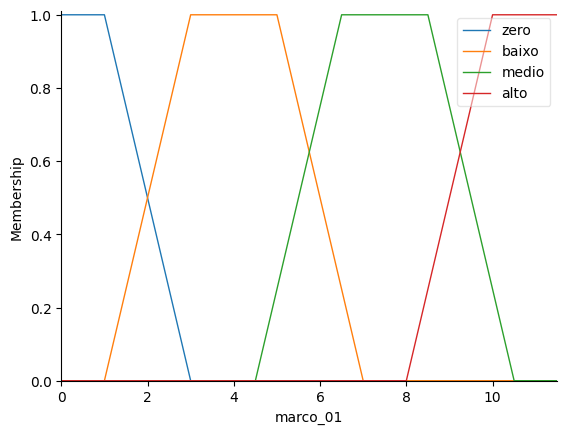

In [475]:
marco_01.view()

## Marco 2: Observa um rosto

In [476]:
marco_02['zero'] = fuzz.trapmf(marco_02.universe, [0, 0, 1, 3])
marco_02['baixo'] = fuzz.trapmf(marco_02.universe, [1, 3, 5, 7])
marco_02['medio'] = fuzz.trapmf(marco_02.universe, [4.5, 6.5, 8.5, 10.5])
marco_02['alto'] = fuzz.trapmf(marco_02.universe, [8, 10, 12, 12])

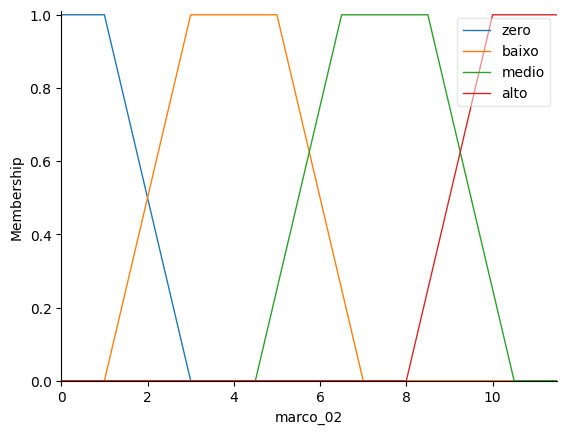

In [477]:
marco_02.view()

## Risco

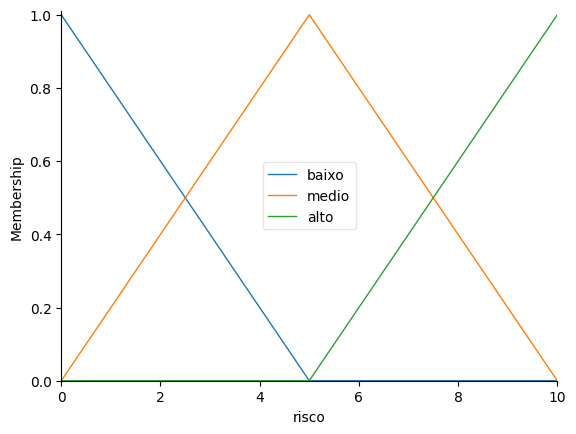

In [478]:
risco.automf(number=3, names=['baixo', 'medio', 'alto'])

risco.view()

## Regras

In [479]:
regra1 = ctrl.Rule(marco_01['zero'] & marco_02['zero'], risco['baixo'])
regra2 = ctrl.Rule(marco_01['baixo'] | marco_02['baixo'], risco['medio'])
regra3 = ctrl.Rule(marco_01['medio'] & marco_02['medio'], risco['alto'])
regra4 = ctrl.Rule(marco_01['alto'] | marco_02['alto'], risco['alto'])

## Predição

In [480]:
risco_predicao = ctrl.ControlSystem([regra1, regra2, regra3])

recomendacao = ctrl.ControlSystemSimulation(risco_predicao)

8.333333333333334


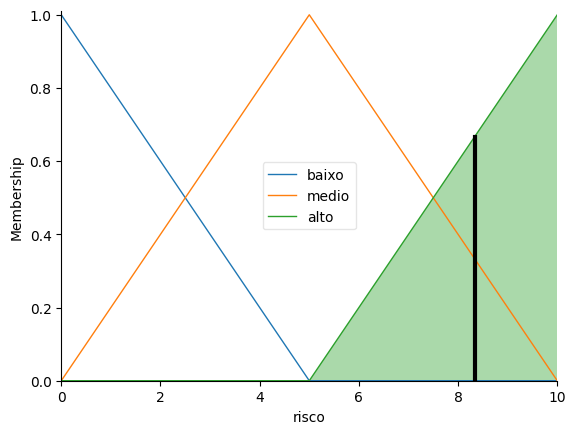

In [481]:
recomendacao.input['marco_01'] = 7
recomendacao.input['marco_02'] = 8

recomendacao.compute()

print(recomendacao.output['risco'])
risco.view(sim = recomendacao)

# **DÚVIDA**

## Marco 15: Localiza o som

In [482]:
# Como ter 2
marco_15 = ctrl.Antecedent(_12_months, '15° Marco')

marco_15['baixo'] = fuzz.trapmf(marco_15.universe, [0, 0, 2, 4])
marco_15['zero'] = fuzz.trapmf(marco_15.universe, [1, 3, 6, 8])
marco_15['baixo'] = fuzz.trapmf(marco_15.universe, [5, 7, 9, 11])
marco_15['medio'] = fuzz.trapmf(marco_15.universe, [8, 10, 12, 12])

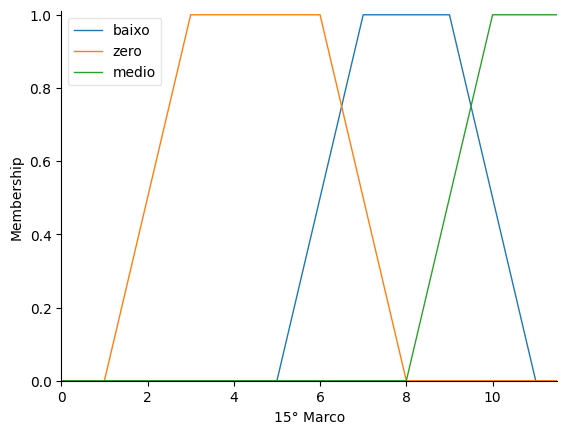

In [483]:
marco_15.view()

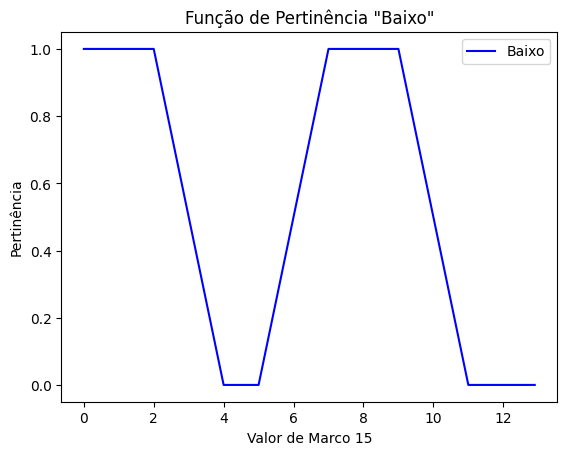

In [484]:
marco_15 = np.arange(0, 13, 0.1)

# Definição das funções de pertinência fuzzy
baixo1 = fuzz.trapmf(marco_15, [0, 0, 2, 4])
baixo2 = fuzz.trapmf(marco_15, [5, 7, 9, 11])

# União das funções de pertinência "baixo"
baixo = np.maximum(baixo1, baixo2)

# Visualização da função de pertinência "baixo"
plt.figure()

plt.plot(marco_15, baixo, 'b', label='Baixo')

plt.title('Função de Pertinência "Baixo"')
plt.xlabel('Valor de Marco 15')
plt.ylabel('Pertinência')

plt.legend()
plt.show()